In [1]:
import pandas as pd
import numpy as np
import os
import sys
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
import argparse
import missingno as msno


# Loading and cleaning

## Edges

In [2]:
# edges = pd.read_csv("C:/Users/felix/OneDrive/McGill Master Work/1 - Winter 25/ORGB 672 - Org Networks/Assignements/A3/edges_sample.csv")
# edges = pd.DataFrame(edges)

edges = pd.read_csv("C:/Users/felix/Downloads/ona-project-data/edges_sample.csv")

ego_examiner_id      2817
alter_examiner_id    1659
dtype: int64


<Axes: >

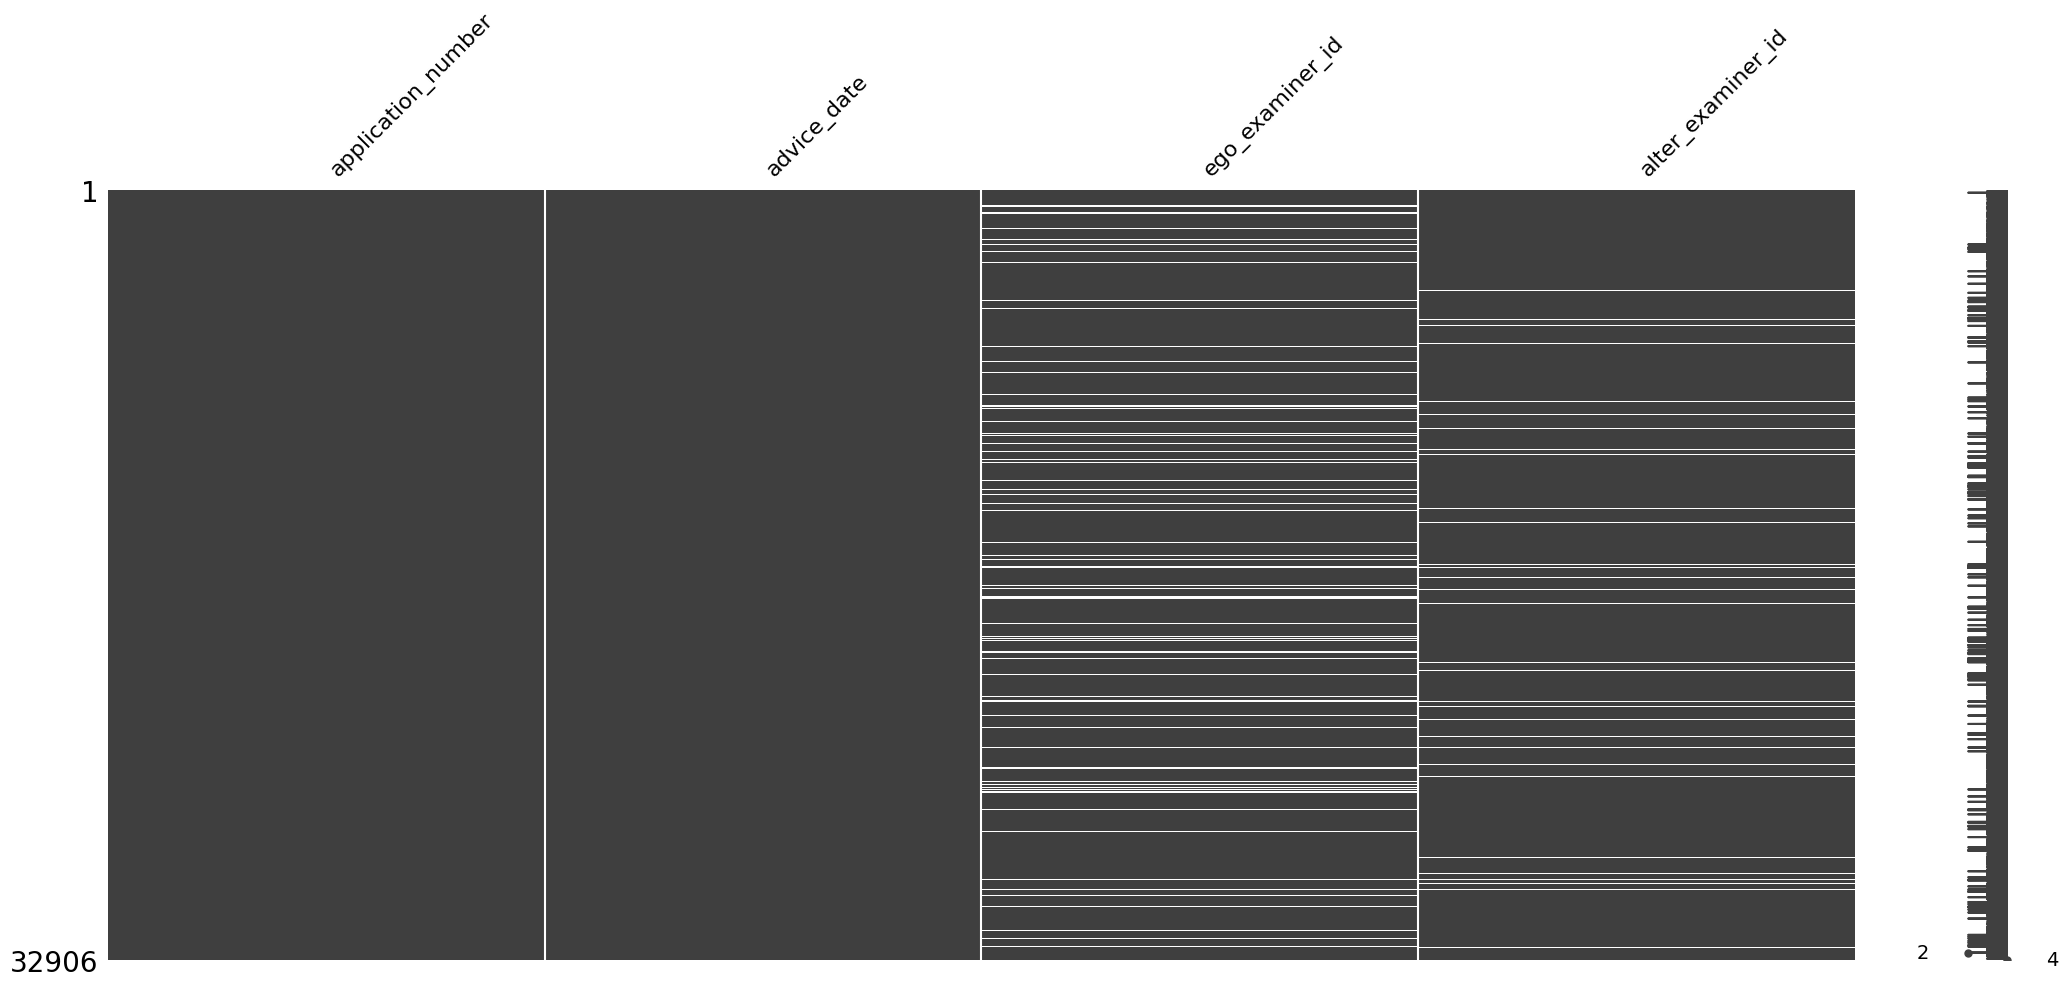

In [3]:
missing_values_with_na = edges.isnull().sum()[edges.isnull().sum() > 0]
print(missing_values_with_na)

# Visualize missingness using missingno
msno.matrix(edges)

In [4]:
edges.dtypes

application_number      int64
advice_date            object
ego_examiner_id       float64
alter_examiner_id     float64
dtype: object

### Dealing with Dates


In [5]:
# Convert the column to datetime format, coercing errors to NaT
edges['advice_date'] = pd.to_datetime(edges['advice_date'], format='%Y-%m-%d', errors='coerce')

# # Calculate the median date, ignoring NaT values
# median_advice_date = edges['advice_date'].dropna().median()

# # Fill NaT values with the median date and assign back to the DataFrame
# edges['advice_date'] = edges['advice_date'].fillna(median_advice_date)

# Format the datetime to the desired string format dd/mm/yy
edges['advice_date'] = edges['advice_date'].dt.strftime('%d/%m/%Y')

In [6]:
# Find first and last dates in app_last_action_date
edge_last_action_dates = pd.to_datetime(edges['advice_date'])
first_date = edge_last_action_dates.min()
last_date = edge_last_action_dates.max()

print(f"First date in edges: {first_date}")
print(f"Last date in edges: {last_date}")

First date in edges: 2008-01-02 00:00:00
Last date in edges: 2008-12-31 00:00:00


C:\Users\felix\AppData\Local\Temp\ipykernel_23968\3084903666.py:2: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  edge_last_action_dates = pd.to_datetime(edges['advice_date'])


### Dealing with NA

In [7]:
import pandas as pd

# Assuming edges is your DataFrame
# edges = pd.read_feather('path_to_your_file.feather')  # Uncomment and use this line if you need to load the data


# replaceid = '10000'
# # Check if "1000" exists in the specified columns
# exists_in_ego = edges['ego_examiner_id'].astype(str).eq(replaceid).any()
# exists_in_alter = edges['alter_examiner_id'].astype(str).eq(replaceid).any()

# # Print the results
# print(f"Does '1000' exist in 'ego_examiner_id'? {exists_in_ego}")
# print(f"Does '1000' exist in 'alter_examiner_id'? {exists_in_alter}")

# edges['ego_examiner_id'] = edges['ego_examiner_id'].fillna(replaceid)
# edges['alter_examiner_id'] = edges['alter_examiner_id'].fillna(replaceid)

# edges['ego_examiner_id'] = edges['ego_examiner_id'].astype(int)
# edges['alter_examiner_id'] = edges['alter_examiner_id'].astype(int)




############## Drop all rows that have NA values ##############
edges = edges.dropna()

# Verify the dropping worked
print(f"Shape after dropping NA rows: {edges.shape}")
print(f"Any NA values remaining: {edges.isnull().any().any()}")





Shape after dropping NA rows: (28614, 4)
Any NA values remaining: False


Series([], dtype: int64)


<Axes: >

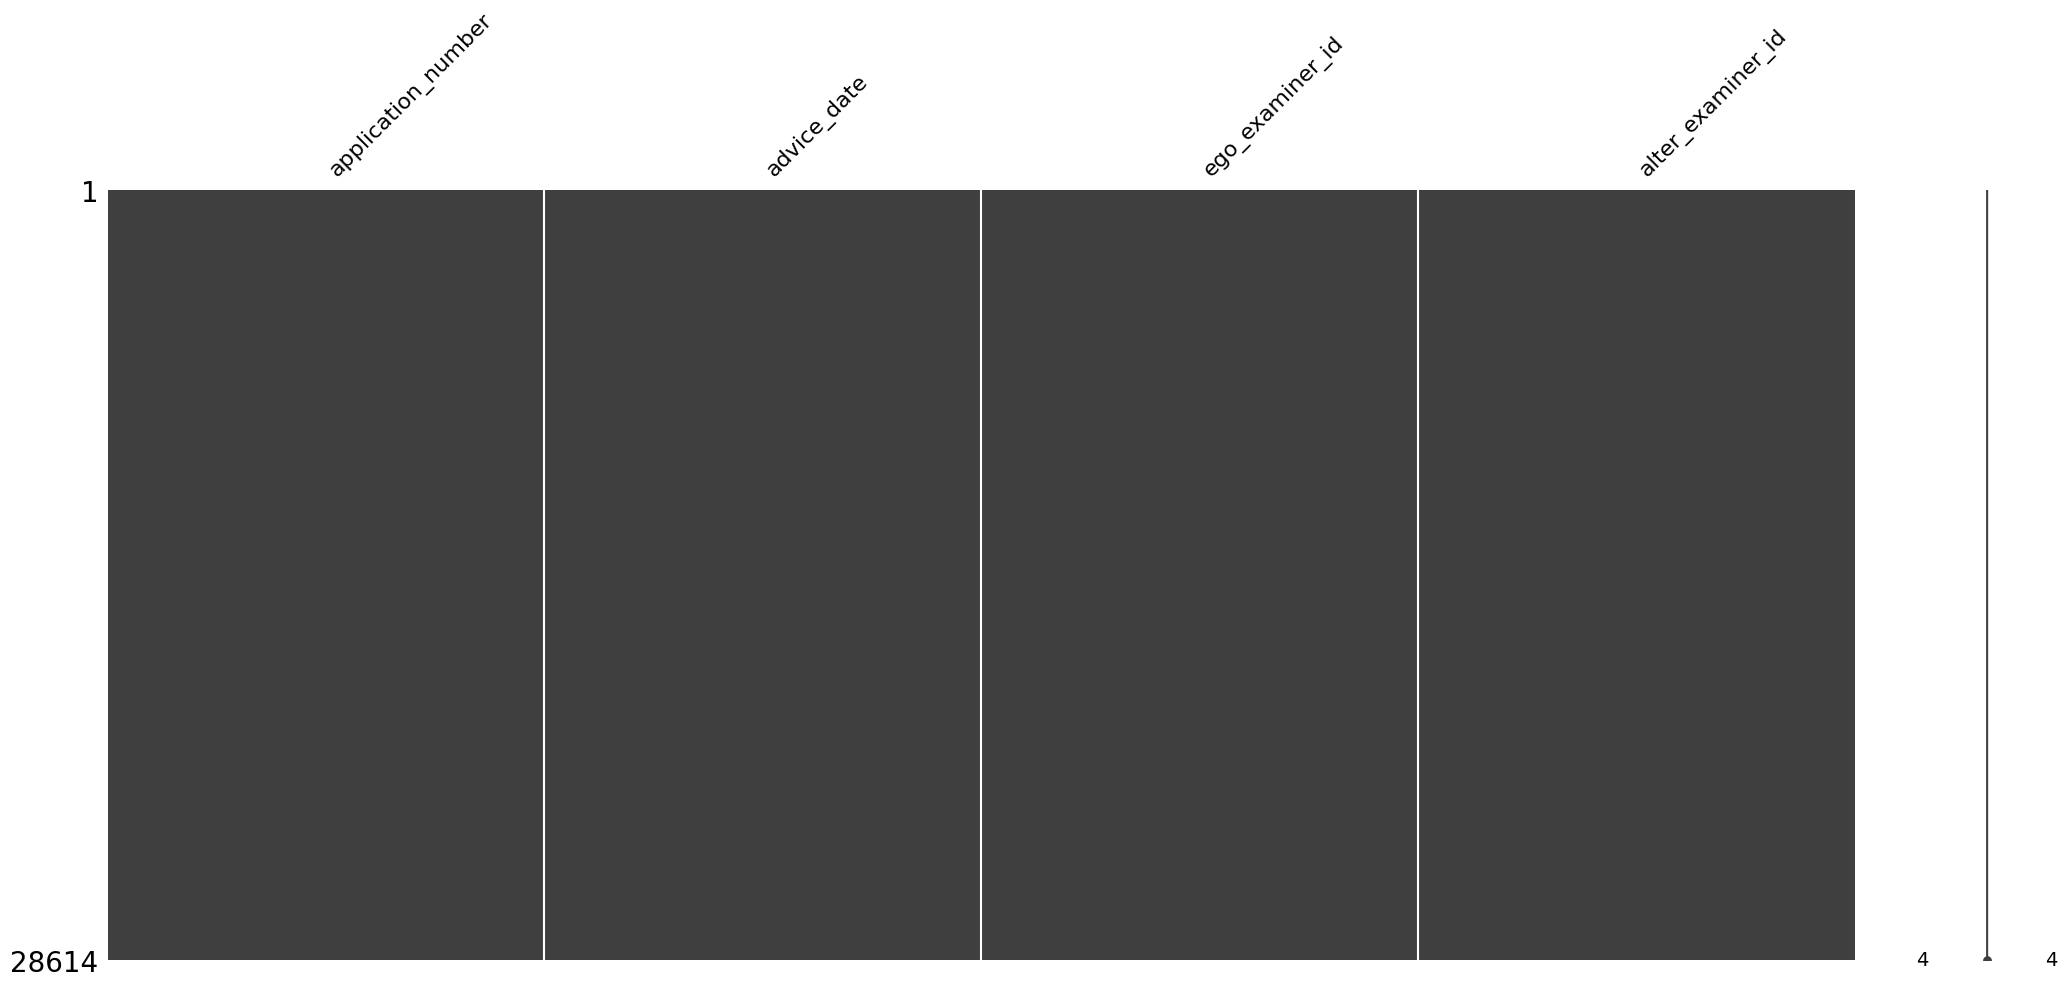

In [8]:
missing_values_with_na = edges.isnull().sum()[edges.isnull().sum() > 0]
print(missing_values_with_na)

# Visualize missingness using missingno
msno.matrix(edges)

## Details

In [9]:
starterdata = pd.read_feather("C:/Users/felix/OneDrive/McGill Master Work/1 - Winter 25/ORGB 672 - Org Networks/Assignements/A3/app_data_starter_coded_202502.feather")
starterdata = pd.DataFrame(starterdata)
starterdata


,application_number,examiner_id,au,app_filing_date,app_last_action_date,app_disposal_type,gender,race,examiner_earliest_date
0,08284457,96082.0,1764.0,2000-01-26,30jan2003 00:00:00,ISS,female,white,2000-01-10
1,08413193,87678.0,1764.0,2000-10-11,27sep2010 00:00:00,ISS,None,white,2000-01-04
2,08531853,63213.0,1752.0,2000-05-17,30mar2009 00:00:00,ISS,female,white,2000-01-06
3,08637752,73788.0,1648.0,2001-07-20,07sep2009 00:00:00,ISS,female,white,2000-01-04
4,08682726,77294.0,1762.0,2000-04-10,19apr2001 00:00:00,ABN,male,white,2000-01-03
...,...,...,...,...,...,...,...,...,...
2018472,95002015,73382.0,2184.0,2012-07-12,22jan2013 00:00:00,PEND,male,black,2002-10-23
2018473,95002034,98907.0,2184.0,2012-07-06,25sep2012 00:00:00,PEND,None,black,2002-06-28
2018474,95002161,98907.0,2184.0,2012-09-07,01oct2012 00:00:00,PEND,None,black,2002-06-28
2018475,95002226,66282.0,2184.0,2012-09-13,05mar2013 00:00:00,PEND,male,Asian,2003-11-25


examiner_id               9229
app_last_action_date      4610
gender                  303859
dtype: int64


<Axes: >

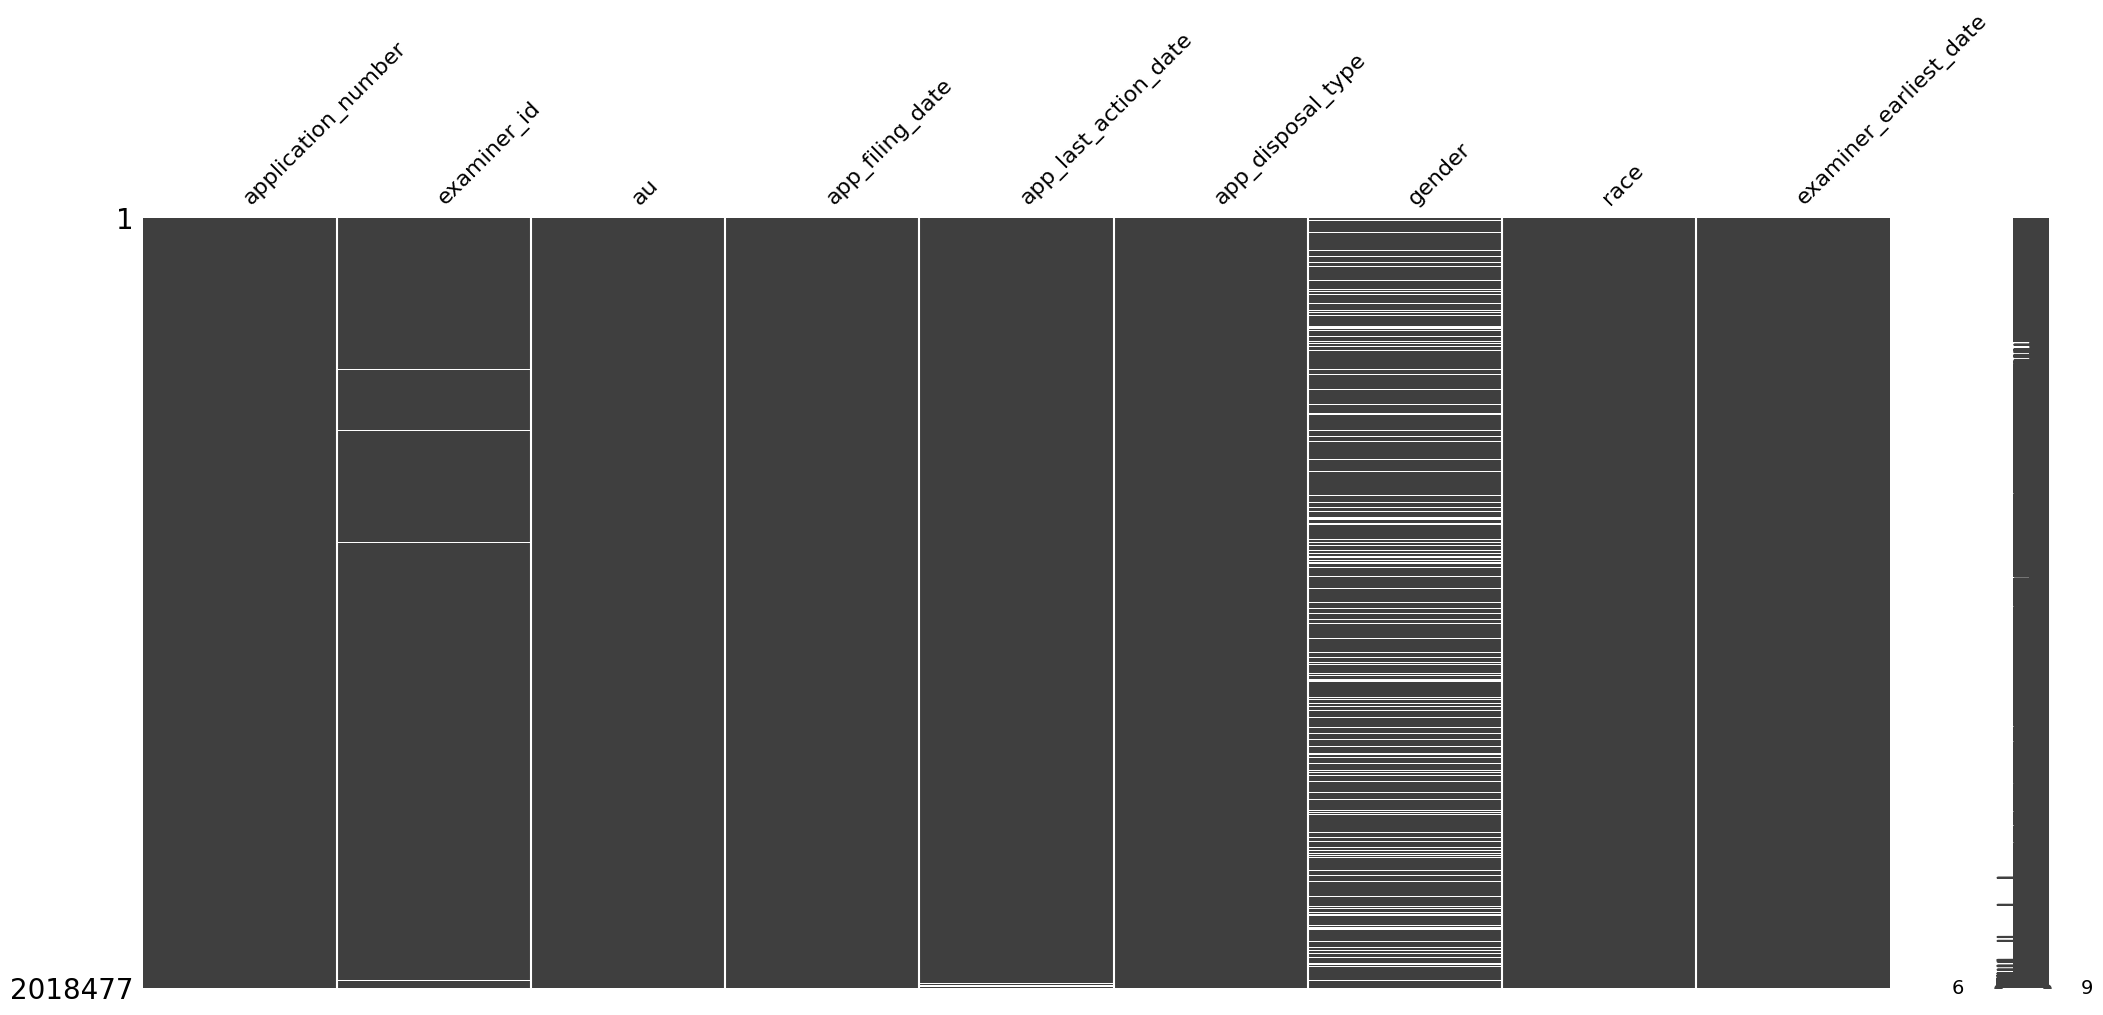

In [10]:
missing_values_with_na = starterdata.isnull().sum()[starterdata.isnull().sum() > 0]
print(missing_values_with_na)

# Visualize missingness using missingno
msno.matrix(starterdata)

### Dealling with dates

In [11]:
# Gender based on name
# tenure is 1st - last action
# drop examiner id
# au give department name


### Dealing with NA

In [12]:
# Convert the columns to datetime format, coercing errors to NaT
starterdata['app_filing_date'] = pd.to_datetime(starterdata['app_filing_date'], format='%d%b%Y %H:%M:%S', errors='coerce')
starterdata['examiner_earliest_date'] = pd.to_datetime(starterdata['examiner_earliest_date'], format='%d%b%Y %H:%M:%S', errors='coerce')
starterdata['app_last_action_date'] = pd.to_datetime(starterdata['app_last_action_date'], format='%d%b%Y %H:%M:%S', errors='coerce')


# # Calculate the median date for each column, ignoring NaT values
# median_app_filing_date = starterdata['app_filing_date'].dropna().median()
# median_examiner_earliest_date = starterdata['examiner_earliest_date'].dropna().median()


# Calculate the median date, ignoring NaT values
latest_date = starterdata['app_last_action_date'].dropna().max()




# # Fill NaT values with the median dates and assign back to the DataFrame
# starterdata['app_filing_date'] = starterdata['app_filing_date'].fillna(median_app_filing_date)
# starterdata['examiner_earliest_date'] = starterdata['examiner_earliest_date'].fillna(median_examiner_earliest_date)

# Fill NaT values with the last date
starterdata['app_last_action_date'].fillna(latest_date, inplace=True)

# Format the datetime to the desired string format dd/mm/yy
starterdata['app_filing_date'] = starterdata['app_filing_date'].dt.strftime('%d/%m/%Y')
starterdata['examiner_earliest_date'] = starterdata['examiner_earliest_date'].dt.strftime('%d/%m/%Y')
starterdata['app_last_action_date'] = starterdata['app_last_action_date'].dt.strftime('%d/%m/%Y')




C:\Users\felix\AppData\Local\Temp\ipykernel_23968\3773342086.py:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  starterdata['app_last_action_date'].fillna(latest_date, inplace=True)


In [13]:
# Creating a dictionary to map examiner_id to gender from non-missing values
examiner_gender_map = starterdata.dropna(subset=['gender']).groupby('examiner_id')['gender'].first().to_dict()




# For rows with missing gender, look up the examiner_id in our map
# If the examiner has a known gender in other rows, use that; otherwise, keep it NaN
starterdata.loc[starterdata['gender'].isna(), 'gender'] = starterdata.loc[starterdata['gender'].isna(), 'examiner_id'].map(examiner_gender_map)

starterdata['gender'] = starterdata['gender'].fillna('Other')


In [14]:
# replaceidstarterdata = '10000'
# # Check if "1000" exists in the specified columns
# exists_in_ego = starterdata['examiner_id'].astype(str).eq(replaceid).any()

# # Print the results
# print(f"Does '{replaceidstarterdata}' exist in 'examiner_id'? {exists_in_ego}")

# starterdata['examiner_id'] = starterdata['examiner_id'].fillna(replaceid)

# starterdata['examiner_id'] = starterdata['examiner_id'].astype(int)

# Drop all rows where examiner_id is NA
starterdata = starterdata.dropna(subset=['examiner_id'])

# Verify the dropping worked
print(f"Shape after dropping NA rows in examiner_id: {starterdata.shape}")
print(f"Any NA values remaining in examiner_id: {starterdata['examiner_id'].isnull().any()}")


Shape after dropping NA rows in examiner_id: (2009248, 9)
Any NA values remaining in examiner_id: False


In [15]:
starterdata.dtypes

application_number         object
examiner_id               float64
au                        float64
app_filing_date            object
app_last_action_date       object
app_disposal_type          object
gender                     object
race                       object
examiner_earliest_date     object
dtype: object

In [16]:
starterdata['au'] = starterdata['au'].astype(int)
starterdata['application_number'] = starterdata['application_number'].astype(int)


C:\Users\felix\AppData\Local\Temp\ipykernel_23968\2402713991.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  starterdata['au'] = starterdata['au'].astype(int)
C:\Users\felix\AppData\Local\Temp\ipykernel_23968\2402713991.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  starterdata['application_number'] = starterdata['application_number'].astype(int)


In [17]:
display(starterdata)

,application_number,examiner_id,au,app_filing_date,app_last_action_date,app_disposal_type,gender,race,examiner_earliest_date
0,8284457,96082.0,1764,26/01/2000,30/01/2003,ISS,female,white,10/01/2000
1,8413193,87678.0,1764,11/10/2000,27/09/2010,ISS,Other,white,04/01/2000
2,8531853,63213.0,1752,17/05/2000,30/03/2009,ISS,female,white,06/01/2000
3,8637752,73788.0,1648,20/07/2001,07/09/2009,ISS,female,white,04/01/2000
4,8682726,77294.0,1762,10/04/2000,19/04/2001,ABN,male,white,03/01/2000
...,...,...,...,...,...,...,...,...,...
2018472,95002015,73382.0,2184,12/07/2012,22/01/2013,PEND,male,black,23/10/2002
2018473,95002034,98907.0,2184,06/07/2012,25/09/2012,PEND,Other,black,28/06/2002
2018474,95002161,98907.0,2184,07/09/2012,01/10/2012,PEND,Other,black,28/06/2002
2018475,95002226,66282.0,2184,13/09/2012,05/03/2013,PEND,male,Asian,25/11/2003


Series([], dtype: int64)


<Axes: >

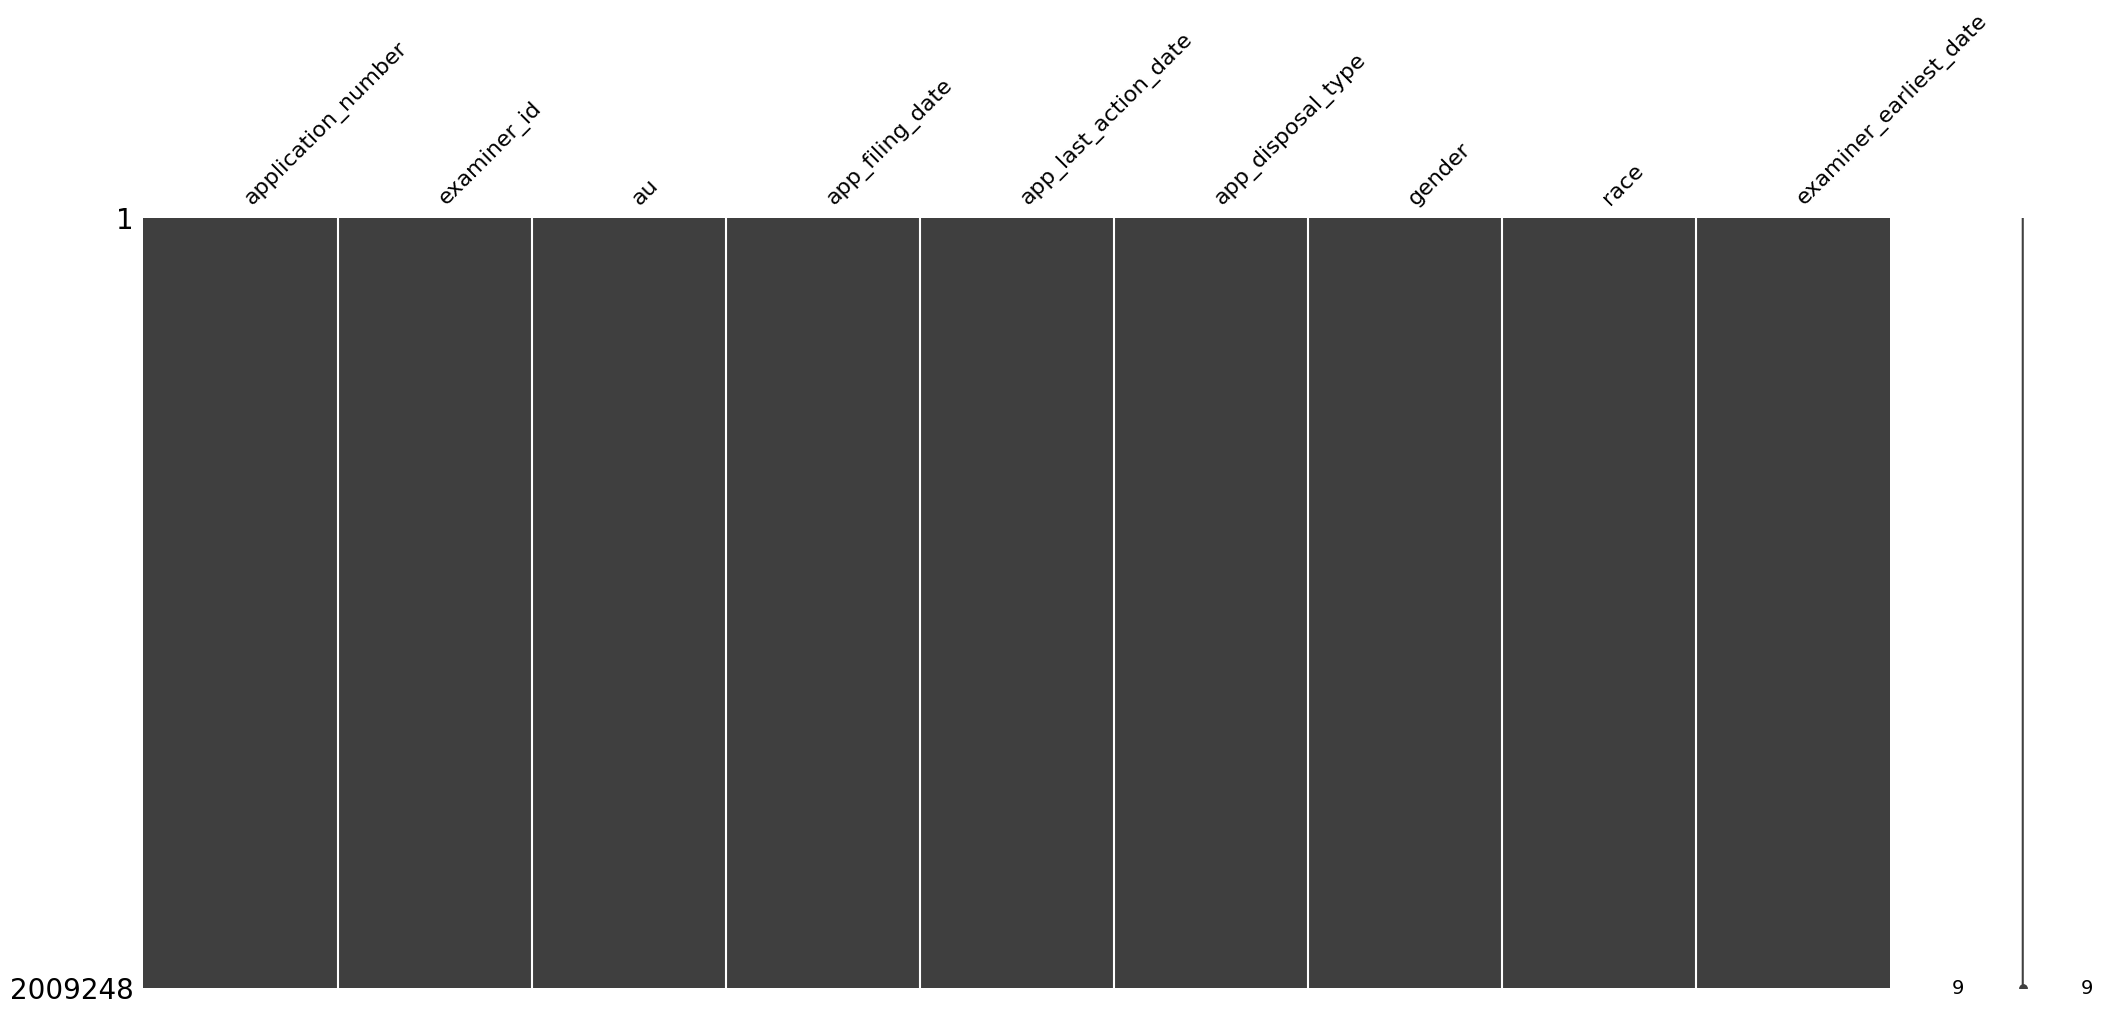

In [18]:
missing_values_with_na = starterdata.isnull().sum()[starterdata.isnull().sum() > 0]
print(missing_values_with_na)

# Visualize missingness using missingno
msno.matrix(starterdata)

In [19]:
# Print unique values for race and gender
print("Unique race values:")
print(starterdata['race'].unique())

print("\nUnique gender values:")
print(starterdata['gender'].unique())

# Print counts for each race and gender
print("\nRace counts:")
race_counts = starterdata['race'].value_counts()
print(race_counts)
print("\nRace proportions:")
print(starterdata['race'].value_counts(normalize=True))

print("\nGender counts:")
gender_counts = starterdata['gender'].value_counts()
print(gender_counts)
print("\nGender proportions:")
print(starterdata['gender'].value_counts(normalize=True))

Unique race values:
['white' 'black' 'Asian' 'Hispanic' 'other']

Unique gender values:
['female' 'Other' 'male']

Race counts:
race
white       1267298
Asian        591644
black         89559
Hispanic      58856
other          1891
Name: count, dtype: int64

Race proportions:
race
white       0.630732
Asian       0.294460
black       0.044573
Hispanic    0.029293
other       0.000941
Name: proportion, dtype: float64

Gender counts:
gender
male      1143391
female     571227
Other      294630
Name: count, dtype: int64

Gender proportions:
gender
male      0.569064
female    0.284299
Other     0.146637
Name: proportion, dtype: float64


In [20]:
tech_center_to_department = {
    16: "Biotechnology_Organic",
    17: "Chemical_Materials-Engineering",
    21: "Computer-Architecture_Software_Information Security",
    24: "Computer-Networks_Multiplex_Cable_Cryptography-Security",
    26: "Communications",
    28: "Semiconductors, Electrical and Optical Systems and Components",
    29: "Designs",
    36: "Transportation, Electronic Commerce, Construction, Agriculture, Licensing and Review",
    37: "Mechanical Engineering, Manufacturing and Products"
}


In [21]:
# Extract the first 2 digits from the 'au' column
starterdata['tech_center'] = (starterdata['au'] // 100).astype(int)

# Map the tech_center to department names using the dictionary
starterdata['center_name'] = starterdata['tech_center'].map(tech_center_to_department)

# For any tech centers not in the dictionary, mark as "Other"
starterdata['center_name'].fillna("Other", inplace=True)


# Count the number of applications by department
center_counts = starterdata['center_name'].value_counts()
print("\nNumber of applications by department:")
print(center_counts)


# Workgroup mapping
# Create workgroup column based on the first 3 digits of the AU column
starterdata['workgroup'] = (starterdata['au'] // 10).astype(int)

# Count the number of applications by workgroup
workgroup_counts = starterdata['workgroup'].value_counts()
print("\nNumber of applications by workgroup:")
print(workgroup_counts.head(10))  # Show just the top 10 workgroups

C:\Users\felix\AppData\Local\Temp\ipykernel_23968\1360096356.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  starterdata['tech_center'] = (starterdata['au'] // 100).astype(int)
C:\Users\felix\AppData\Local\Temp\ipykernel_23968\1360096356.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  starterdata['center_name'] = starterdata['tech_center'].map(tech_center_to_department)
C:\Users\felix\AppData\Local\Temp\ipykernel_23968\1360096356.py:8: FutureWarning: A value is trying to be set on a copy of a DataFr


Number of applications by department:
center_name
Chemical_Materials-Engineering                             717175
Biotechnology_Organic                                      530918
Computer-Architecture_Software_Information Security        410480
Computer-Networks_Multiplex_Cable_Cryptography-Security    350675
Name: count, dtype: int64

Number of applications by workgroup:
workgroup
162    140708
179    132856
164     92531
176     90972
163     89999
161     89057
177     83004
172     79050
171     76314
174     75079
Name: count, dtype: int64


C:\Users\felix\AppData\Local\Temp\ipykernel_23968\1360096356.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  starterdata['workgroup'] = (starterdata['au'] // 10).astype(int)


In [22]:

# Check for self-loops
self_loops = edges[edges['ego_examiner_id'] == edges['alter_examiner_id']]

if not self_loops.empty:
    print("Self-loops found:")
    print(self_loops)
else:
    print("No self-loops found.")

# Check for duplicate entries in edges
duplicate_edges = edges[edges.duplicated()]

if not duplicate_edges.empty:
    print("\nDuplicate edges found:")
    print(duplicate_edges)
else:
    print("No duplicate edges found.")

# Check for data mismatch between edges and starterdata
examiner_ids_in_edges = set(edges['ego_examiner_id']).union(set(edges['alter_examiner_id']))
examiner_ids_in_starterdata = set(starterdata['examiner_id'])

missing_examiner_ids = examiner_ids_in_edges - examiner_ids_in_starterdata

# if missing_examiner_ids:
#     print("\nExaminer IDs in edges but not in starterdata:")
#     print(missing_examiner_ids)
# else:
#     print("All examiner IDs in edges are present in starterdata.")



Self-loops found:
       application_number advice_date  ego_examiner_id  alter_examiner_id
11                9484331  07/02/2008          72253.0            72253.0
192               9683599  08/01/2008          88496.0            88496.0
318               9750105  21/07/2008          65231.0            65231.0
796               9946781  01/04/2008          65231.0            65231.0
1009             10006760  09/12/2008          74224.0            74224.0
...                   ...         ...              ...                ...
32526            11965459  26/11/2008          69394.0            69394.0
32592            12014084  03/07/2008          91190.0            91190.0
32610            12022133  21/07/2008          91190.0            91190.0
32639            12037172  23/12/2008          88818.0            88818.0
32682            12057827  18/11/2008          69394.0            69394.0

[843 rows x 4 columns]
No duplicate edges found.


In [23]:
# Remove edges with examiner IDs not present in starterdata
edges_cleaned = edges[
    edges['ego_examiner_id'].isin(starterdata['examiner_id']) &
    edges['alter_examiner_id'].isin(starterdata['examiner_id'])
]

# Verify the cleaning process
missing_examiner_ids_after_cleaning = set(edges_cleaned['ego_examiner_id']).union(set(edges_cleaned['alter_examiner_id'])) - set(starterdata['examiner_id'])

if not missing_examiner_ids_after_cleaning:
    print("All examiner IDs in cleaned edges are present in starterdata.")
else:
    print("There are still missing examiner IDs after cleaning.")


All examiner IDs in cleaned edges are present in starterdata.


In [24]:
print("'edges' data columns:")
print(edges.columns.tolist())
print("'data' data columns:")
print(starterdata.columns.tolist())


print("'edges' data types:")
print(edges.dtypes)
print("'data' data types:")
print(starterdata.dtypes)

'edges' data columns:
['application_number', 'advice_date', 'ego_examiner_id', 'alter_examiner_id']
'data' data columns:
['application_number', 'examiner_id', 'au', 'app_filing_date', 'app_last_action_date', 'app_disposal_type', 'gender', 'race', 'examiner_earliest_date', 'tech_center', 'center_name', 'workgroup']
'edges' data types:
application_number      int64
advice_date            object
ego_examiner_id       float64
alter_examiner_id     float64
dtype: object
'data' data types:
application_number          int64
examiner_id               float64
au                          int64
app_filing_date            object
app_last_action_date       object
app_disposal_type          object
gender                     object
race                       object
examiner_earliest_date     object
tech_center                 int64
center_name                object
workgroup                   int64
dtype: object


In [25]:
# Convert date columns to datetime64[ns] format
date_columns_edges = ['advice_date']  # Replace with actual date column names in edges
date_columns_starterdata = ['app_filing_date', 'app_last_action_date',  'examiner_earliest_date']  # Replace with actual date column names in starterdata

for col in date_columns_edges:
    edges[col] = pd.to_datetime(edges[col])

for col in date_columns_starterdata:
    starterdata[col] = pd.to_datetime(starterdata[col], format='mixed', dayfirst=True, errors='coerce')

# Print updated data types
print("\nUpdated 'edges' data types:")
print(edges.dtypes)
print("Updated 'data' data types:")
print(starterdata.dtypes)

C:\Users\felix\AppData\Local\Temp\ipykernel_23968\2401333663.py:6: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  edges[col] = pd.to_datetime(edges[col])
C:\Users\felix\AppData\Local\Temp\ipykernel_23968\2401333663.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  starterdata[col] = pd.to_datetime(starterdata[col], format='mixed', dayfirst=True, errors='coerce')
C:\Users\felix\AppData\Local\Temp\ipykernel_23968\2401333663.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyda


Updated 'edges' data types:
application_number             int64
advice_date           datetime64[ns]
ego_examiner_id              float64
alter_examiner_id            float64
dtype: object
Updated 'data' data types:
application_number                 int64
examiner_id                      float64
au                                 int64
app_filing_date           datetime64[ns]
app_last_action_date      datetime64[ns]
app_disposal_type                 object
gender                            object
race                              object
examiner_earliest_date    datetime64[ns]
tech_center                        int64
center_name                       object
workgroup                          int64
dtype: object


C:\Users\felix\AppData\Local\Temp\ipykernel_23968\2401333663.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  starterdata[col] = pd.to_datetime(starterdata[col], format='mixed', dayfirst=True, errors='coerce')


# Data Dictionary

#### Edges DataFrame

| Column Name         | Description                                                                 | Data Type |
|---------------------|-----------------------------------------------------------------------------|-----------|
| application_number  | The unique identifier for the patent application.                          | String    |
| advice_date         | The date when the advice or interaction occurred.                           | Date      |
| ego_examiner_id     | The ID of the examiner who is the source of the advice or interaction.      | Integer   |
| alter_examiner_id   | The ID of the examiner who is the target of the advice or interaction.      | Integer   |

#### Starterdata DataFrame

| Column Name             | Description                                                                 | Data Type |
|-------------------------|-----------------------------------------------------------------------------|-----------|
| application_number      | The unique identifier for the patent application.                          | String    |
| examiner_id             | The unique ID of the examiner.                                              | Integer   |
| au                      | The art unit (workgroup) to which the examiner belongs.                     | String    |
| app_filing_date         | The date when the patent application was filed.                             | Date      |
| app_last_action_date    | The date of the last action taken on the patent application.                | Date      |
| app_disposal_type       | The type of disposal for the patent application (e.g., granted, abandoned).| String    |
| gender                  | The gender of the examiner.                                                | String    |
| race                    | The race of the examiner.                                                   | String    |
| examiner_earliest_date  | The earliest date associated with the examiner's tenure or hiring.          | Date      |
| workgroup               | The workgroup to which the examiner belongs.                                | String    |
| tech_center             | The technology center associated with the examiner's work.                  | String    |
| center_name             | The name of the center where the examiner works.                            | String    |


### processing_time

In [28]:
# Convert date columns to datetime for calculation
starterdata['app_filing_date_dt'] = pd.to_datetime(starterdata['app_filing_date'], format='%d/%m/%Y', errors='coerce')
starterdata['app_last_action_date_dt'] = pd.to_datetime(starterdata['app_last_action_date'], format='%d/%m/%Y', errors='coerce')

# Calculate the difference in days
starterdata['processing_time'] = (starterdata['app_last_action_date_dt'] - starterdata['app_filing_date_dt']).dt.days

# Display some statistics about the new column
print("Processing Time Statistics (in days):")
print(f"Mean: {starterdata['processing_time'].mean():.2f}")
print(f"Median: {starterdata['processing_time'].median():.0f}")
print(f"Min: {starterdata['processing_time'].min()}")
print(f"Max: {starterdata['processing_time'].max()}")

# Check for any negative values (which would indicate data issues)
negative_days = starterdata[starterdata['processing_time'] < 0].shape[0]
print(f"Number of applications with negative processing time: {negative_days}")

# Drop the temporary datetime columns to save memory
starterdata.drop(['app_filing_date_dt', 'app_last_action_date_dt'], axis=1, inplace=True)

# Show the first few rows with the new column
starterdata[['application_number', 'app_filing_date', 'app_last_action_date', 'processing_time']].head()

C:\Users\felix\AppData\Local\Temp\ipykernel_23968\2502578150.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  starterdata['app_filing_date_dt'] = pd.to_datetime(starterdata['app_filing_date'], format='%d/%m/%Y', errors='coerce')
C:\Users\felix\AppData\Local\Temp\ipykernel_23968\2502578150.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  starterdata['app_last_action_date_dt'] = pd.to_datetime(starterdata['app_last_action_date'], format='%d/%m/%Y', errors='coerce')
C:\Users\felix\AppData\Local\Temp\ipyk

Processing Time Statistics (in days):
Mean: 1384.43
Median: 1121
Min: -160
Max: 18159
Number of applications with negative processing time: 4


C:\Users\felix\AppData\Local\Temp\ipykernel_23968\2502578150.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  starterdata.drop(['app_filing_date_dt', 'app_last_action_date_dt'], axis=1, inplace=True)


,application_number,app_filing_date,app_last_action_date,processing_time
0,8284457,2000-01-26,2003-01-30,1100
1,8413193,2000-10-11,2010-09-27,3638
2,8531853,2000-05-17,2009-03-30,3239
3,8637752,2001-07-20,2009-09-07,2971
4,8682726,2000-04-10,2001-04-19,374


In [ ]:
starterdata.to_csv("C:/Users/felix/OneDrive/McGill Master Work/1 - Winter 25/ORGB 672 - Org Networks/Group Project/USTPO_Patent_Approval_Network_Analytics/Data/00_starterdata_cleaned(Approach_1).csv", index=False)
edges_cleaned.to_csv("C:/Users/felix/OneDrive/McGill Master Work/1 - Winter 25/ORGB 672 - Org Networks/Group Project/USTPO_Patent_Approval_Network_Analytics/Data/00_edges_cleaned(Approach_1).csv", index=False)